In [1]:
!pip install tensorflow

C:\Users\Hassa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\Hassa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_train_path = r"C:\Fruits\train"
data_test_path = r"C:\Fruits\test"
data_validation_path = r"C:\Fruits\validation"

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
data_train_path,
shuffle = False,
image_size = (img_width, img_height),
batch_size = 34,
validation_split = False)

Found 288 files belonging to 9 classes.


In [5]:
data_train.class_names

['Apple',
 'Bananna',
 'Cherry',
 'Chickoo',
 'Grapes',
 'Kiwi',
 'Mango',
 'Orange',
 'Strawberry']

In [6]:
data_validation = tf.keras.utils.image_dataset_from_directory(
data_validation_path,
shuffle = False,
image_size = (img_width, img_height),
batch_size = 34,
validation_split = False)

Found 36 files belonging to 9 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
shuffle = False,
image_size = (img_width, img_height),
batch_size = 34,
validation_split = False)

Found 36 files belonging to 9 classes.


In [8]:
data_cat = data_train.class_names
data_cat

['Apple',
 'Bananna',
 'Cherry',
 'Chickoo',
 'Grapes',
 'Kiwi',
 'Mango',
 'Orange',
 'Strawberry']

In [9]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding ='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))                  
])

In [10]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
history = model.fit(data_train, validation_data = data_validation, epochs = 25)

Epoch 1/25


9/9 [==============================] - 5s 354ms/step - loss: 6.4284 - accuracy: 0.0035 - val_loss: 2.1952 - val_accuracy: 0.1111
Epoch 2/25
9/9 [==============================] - 3s 339ms/step - loss: 2.2136 - accuracy: 0.1146 - val_loss: 2.1933 - val_accuracy: 0.2222
Epoch 3/25
9/9 [==============================] - 3s 335ms/step - loss: 2.1986 - accuracy: 0.0972 - val_loss: 2.1843 - val_accuracy: 0.2778
Epoch 4/25
9/9 [==============================] - 3s 345ms/step - loss: 2.1654 - accuracy: 0.2188 - val_loss: 2.1407 - val_accuracy: 0.1111
Epoch 5/25
9/9 [==============================] - 3s 354ms/step - loss: 2.1168 - accuracy: 0.2188 - val_loss: 2.1231 - val_accuracy: 0.1667
Epoch 6/25
9/9 [==============================] - 3s 329ms/step - loss: 2.0478 - accuracy: 0.2153 - val_loss: 2.0916 - val_accuracy: 0.1944
Epoch 7/25
9/9 [==============================] - 3s 350ms/step - loss: 1.9364 - accuracy: 0.2812 - val_loss: 2.0649 - val_accuracy: 0.2778
Epoch 8/25
9/9 [==

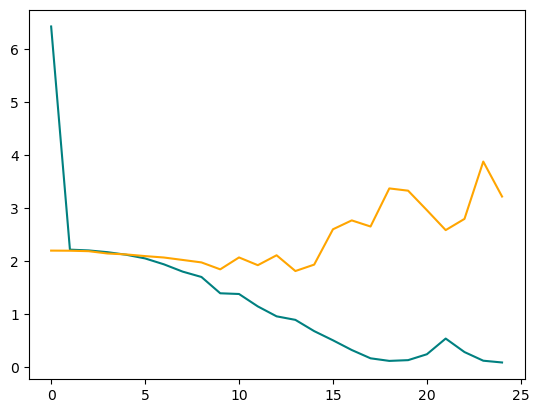

In [12]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='accuracy')
plt.plot(history.history["val_loss"], color='orange', label='val_accuracy')
fig.suptitle=('Loss')
plt.show()

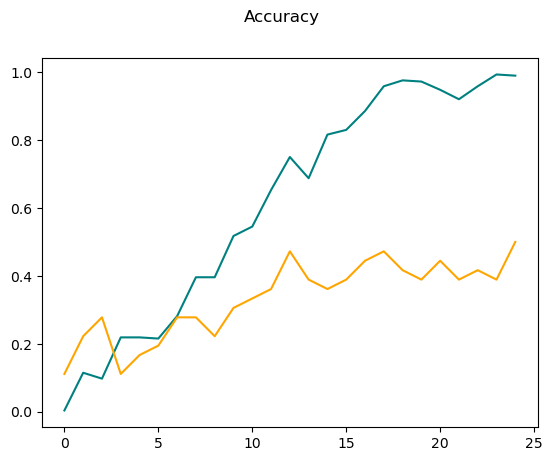

In [13]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history["val_accuracy"], color='orange', label='val_accuracy')
fig.suptitle('Accuracy')
plt.show()


In [12]:
!pip install opencv-python


In [14]:
import os
import cv2

In [24]:
data_test_path = r"C:\Fruits\test\Grapes"

def preprocess_image(img_path):
    print("Image Path:", img_path)
    # Read image using OpenCV
    img = cv2.imread(img_path)
    if img is None:
        print("Failed to load image")
        return None
    # Resize image to match input shape of the model
    img = cv2.resize(img, (180, 180))  # Update desired_width and desired_height to match your model's input shape
    # Normalize pixel values
    img = img / 255.0  # Assuming the model used rescaling by 1./255 during training
    # Expand dimensions to match the expected input shape (batch size, width, height, channels)
    img = np.expand_dims(img, axis=0)
    return img


for filename in os.listdir(data_test_path):
        # Construct the full path of the image
        img_path = os.path.join(data_test_path, filename)
        # Preprocess the image
        img = preprocess_image(img_path)
        img = img[0]
        img_arr = tf.keras.utils.array_to_img(img)
        img_bat = tf.expand_dims(img_arr,0)
        
        prediction = model.predict(img_bat)
        
        score = tf.nn.softmax(prediction)
        
        print("Veg/Fruit in image is {} with accuracy of {:0.2f}%\n".format(data_cat[np.argmax(score)],np.max(score*100)))
                    # Get the raw predictions (before applying softmax)


Image Path: C:\Fruits\test\Grapes\Image_37.jpg
1/1 [==============================] - 0s 24ms/step
Veg/Fruit in image is Grapes with accuracy of 98.00%

Image Path: C:\Fruits\test\Grapes\Image_38.jpg
1/1 [==============================] - 0s 32ms/step
Veg/Fruit in image is Cherry with accuracy of 99.24%

Image Path: C:\Fruits\test\Grapes\Image_39.jpg
1/1 [==============================] - 0s 31ms/step
Veg/Fruit in image is Grapes with accuracy of 98.71%

Image Path: C:\Fruits\test\Grapes\Image_40.jpg
1/1 [==============================] - 0s 30ms/step
Veg/Fruit in image is Mango with accuracy of 69.85%

